# Generar un modelo neuronal que a partir de fahrenheit prediga centígrados

El caso de uso va a ser como dice el título, predecir centígrados a partir de un modelo que reciba fahrenheit cómo inputs.

## Generación de datos

Generamos las temperaturas para entrenar el modelo y testear usando la fórmula para pasar de fahrenheit a centígrados. 

Luego para ello genero 5000 temperaturas para tener un buen cojunito de datos y no quedarme escaso para el entrenamiento del modelo.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models, layers

# generamos un numpy array con 1000 números entre 0 y 100 con dos decimales de precisión
temperaturas_f = np.random.uniform(-100, 100, 5000).round(decimals=2)

# convertimos de Fahrenheit a Celsius
temperaturas_c = (temperaturas_f - 32) * 5/9

# redondeamos a dos decimales
temperaturas_c = np.round(temperaturas_c, 2)

# imprimimos los primeros 10 valores de cada array
print(temperaturas_f[:10])
print(temperaturas_c[:10])

[-42.08  51.93 -12.56 -13.46 -51.29  52.53 -73.41  18.16 -11.95  28.7 ]
[-41.16  11.07 -24.76 -25.26 -46.27  11.41 -58.56  -7.69 -24.42  -1.83]


# Creación del dataframe

Justamos ambos datos en un mismo dataframe.

In [ ]:
df = pd.DataFrame(data=temperaturas_f,columns=['Fahrenheit'])
df['Centígrados'] = temperaturas_c

In [ ]:
df

,Fahrenheit,Centígrados
0,-42.08,-41.16
1,51.93,11.07
2,-12.56,-24.76
3,-13.46,-25.26
4,-51.29,-46.27
...,...,...
4995,-39.41,-39.67
4996,55.05,12.81
4997,36.24,2.36
4998,38.18,3.43


## Generación de modelo

Primero separamos los datos en un 80% para train y un 20% para test, luego para el entrenaminento vamos a usar un 5% de los datos de train para validar el modelo.

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(df['Fahrenheit'],df['Centígrados'], test_size=0.2, random_state=42)

In [ ]:
#Obtención del 5% de los datos
x_val,x_test,y_val,y_test =  train_test_split(X_train,Y_train, test_size=0.05, random_state=42)

In [ ]:
model = models.Sequential() 
model.add(layers.Dense(32,input_shape=[1]))
model.add(layers.Dense(64))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32))
model.add(layers.Dense(1))

Visto que es un problema de regresión vamos a usar las métricas del error medio absoluto para la precisión y el cuadrático para el porcentaje de pérdida.

In [ ]:
model.compile(
    optimizer = 'Adam',
    loss='mse',
    metrics= ['mae']
)

Entrenamos el modelo.

In [ ]:
history = model.fit(X_train,Y_train, epochs=100,validation_data=[x_val,y_val])

Epoch 1/100
125/125 [==============================] - 5s 17ms/step - loss: 445.1623 - mae: 17.9969 - val_loss: 240.8873 - val_mae: 15.3955
Epoch 2/100
125/125 [==============================] - 2s 14ms/step - loss: 214.3587 - mae: 13.5925 - val_loss: 116.2403 - val_mae: 10.7775
Epoch 3/100
125/125 [==============================] - 2s 15ms/step - loss: 77.0097 - mae: 7.2763 - val_loss: 5.0528 - val_mae: 2.2228
Epoch 4/100
125/125 [==============================] - 3s 21ms/step - loss: 30.4047 - mae: 4.1252 - val_loss: 9.8621 - val_mae: 2.6804
Epoch 5/100
125/125 [==============================] - 2s 14ms/step - loss: 31.0723 - mae: 4.0934 - val_loss: 11.3094 - val_mae: 2.8897
Epoch 6/100
125/125 [==============================] - 1s 10ms/step - loss: 29.0935 - mae: 3.9439 - val_loss: 9.8204 - val_mae: 2.6866
Epoch 7/100
125/125 [==============================] - 1s 6ms/step - loss: 25.4937 - mae: 3.6802 - val_loss: 1.9205 - val_mae: 1.1859
Epoch 8/100
125/125 [========================

## Predicción y Evaluación

In [ ]:
pred = model.predict(X_test)

32/32 [==============================] - 0s 2ms/step


In [ ]:
loss, accuracy = model.evaluate(X_test,Y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

32/32 [==============================] - 0s 1ms/step - loss: 0.5561 - mae: 0.6424
Test loss: 0.5561376810073853
Test accuracy: 0.6424043774604797


## Fase de visualización

Muestro una pequeña gráfica sobre el historial de la precisión de los datos de training con respecto a los datos de validación y otra igual con la métrica de pérdida por épocas.
Se puede apreciar que el modelo no está sobreentrenando ni teniendo un entrenamiento ínfimo por tanto se ha realizado un buen entrenamiento.

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['mae']
val_acc = history.history['val_mae']

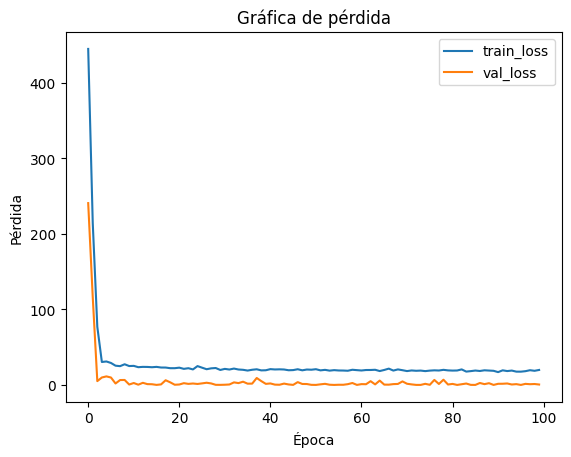

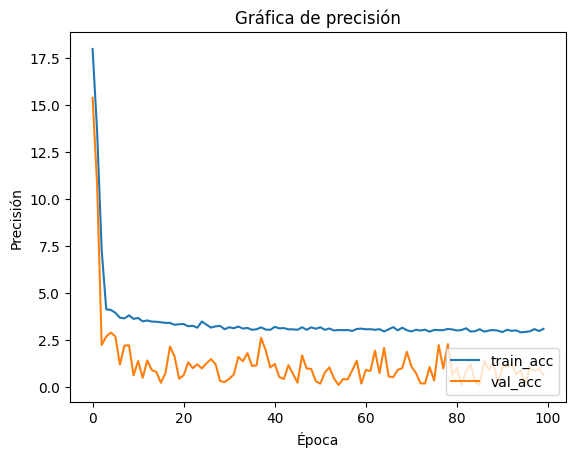

In [ ]:
# Gráfica de pérdida
plt.plot(loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.legend(loc='upper right')
plt.title('Gráfica de pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

# Gráfica de precisión
plt.plot(acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.legend(loc='lower right')
plt.title('Gráfica de precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()

Text(0, 0.5, 'Predicted Celsius')

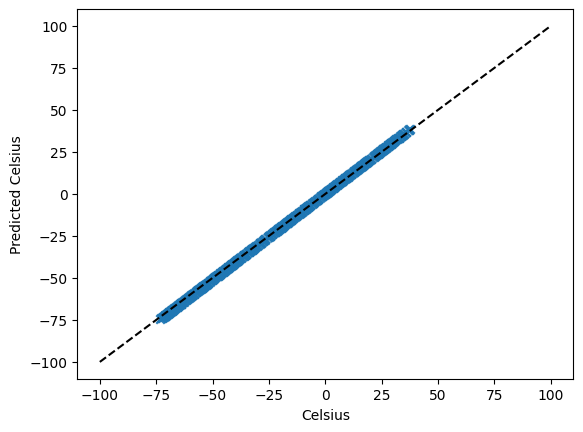

In [ ]:
#Gráfico de difusión
plt.scatter(Y_test, pred , alpha = 0.7, marker = 'x')
plt.plot([-100, 100], [-100, 100], "--k")
plt.axis("tight")
plt.xlabel("Celsius")
plt.ylabel("Predicted Celsius")

## Importar modelo

Guardamos el modelo.

In [ ]:
model.save('fahrenheit_a_celsius.h5')

Creamos una carpeta de salida dónde se van a generar el json y el bin del modelo.

In [ ]:
!mkdir salida

## Instalar tensorflowjs

Instalamos el la librería tensorflow js para convertirlo a un modelo que se pueda usar para javascript en una web.

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 41.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━

Finalmente convertimos el modelo y generamos los ficheros en la carpeta salida.

In [ ]:
!tensorflowjs_converter --input_format keras fahrenheit_a_celsius.h5 salida

2023-05-04 17:29:01.185797: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-05-04 17:29:01.185956: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-05-04 17:29:01.185981: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


# Imagen del código de la web

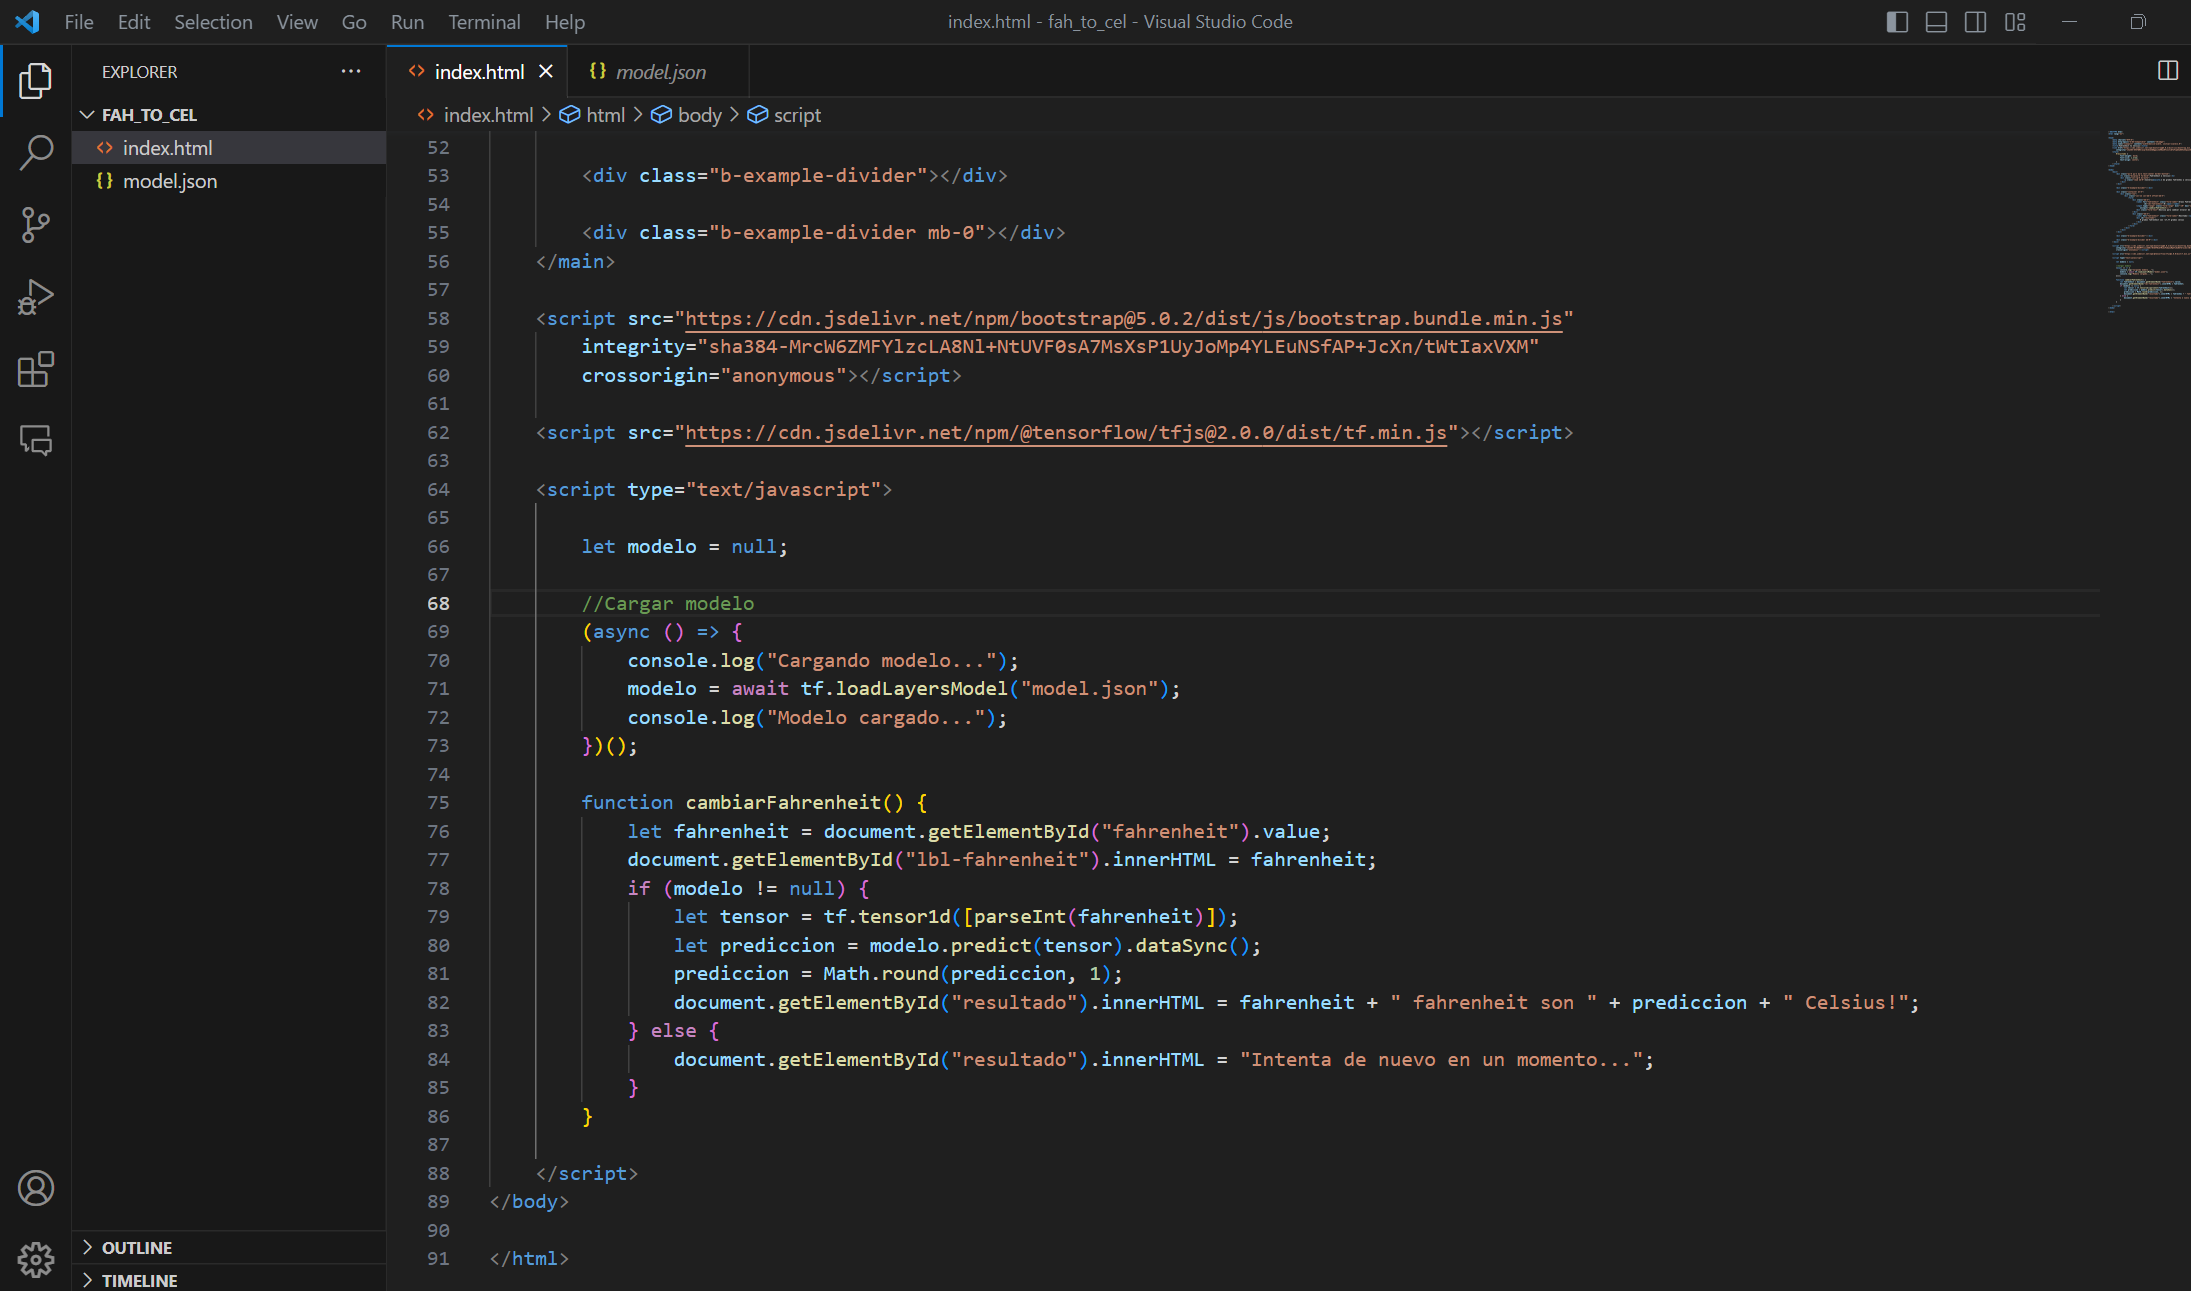

# Imagen de la web

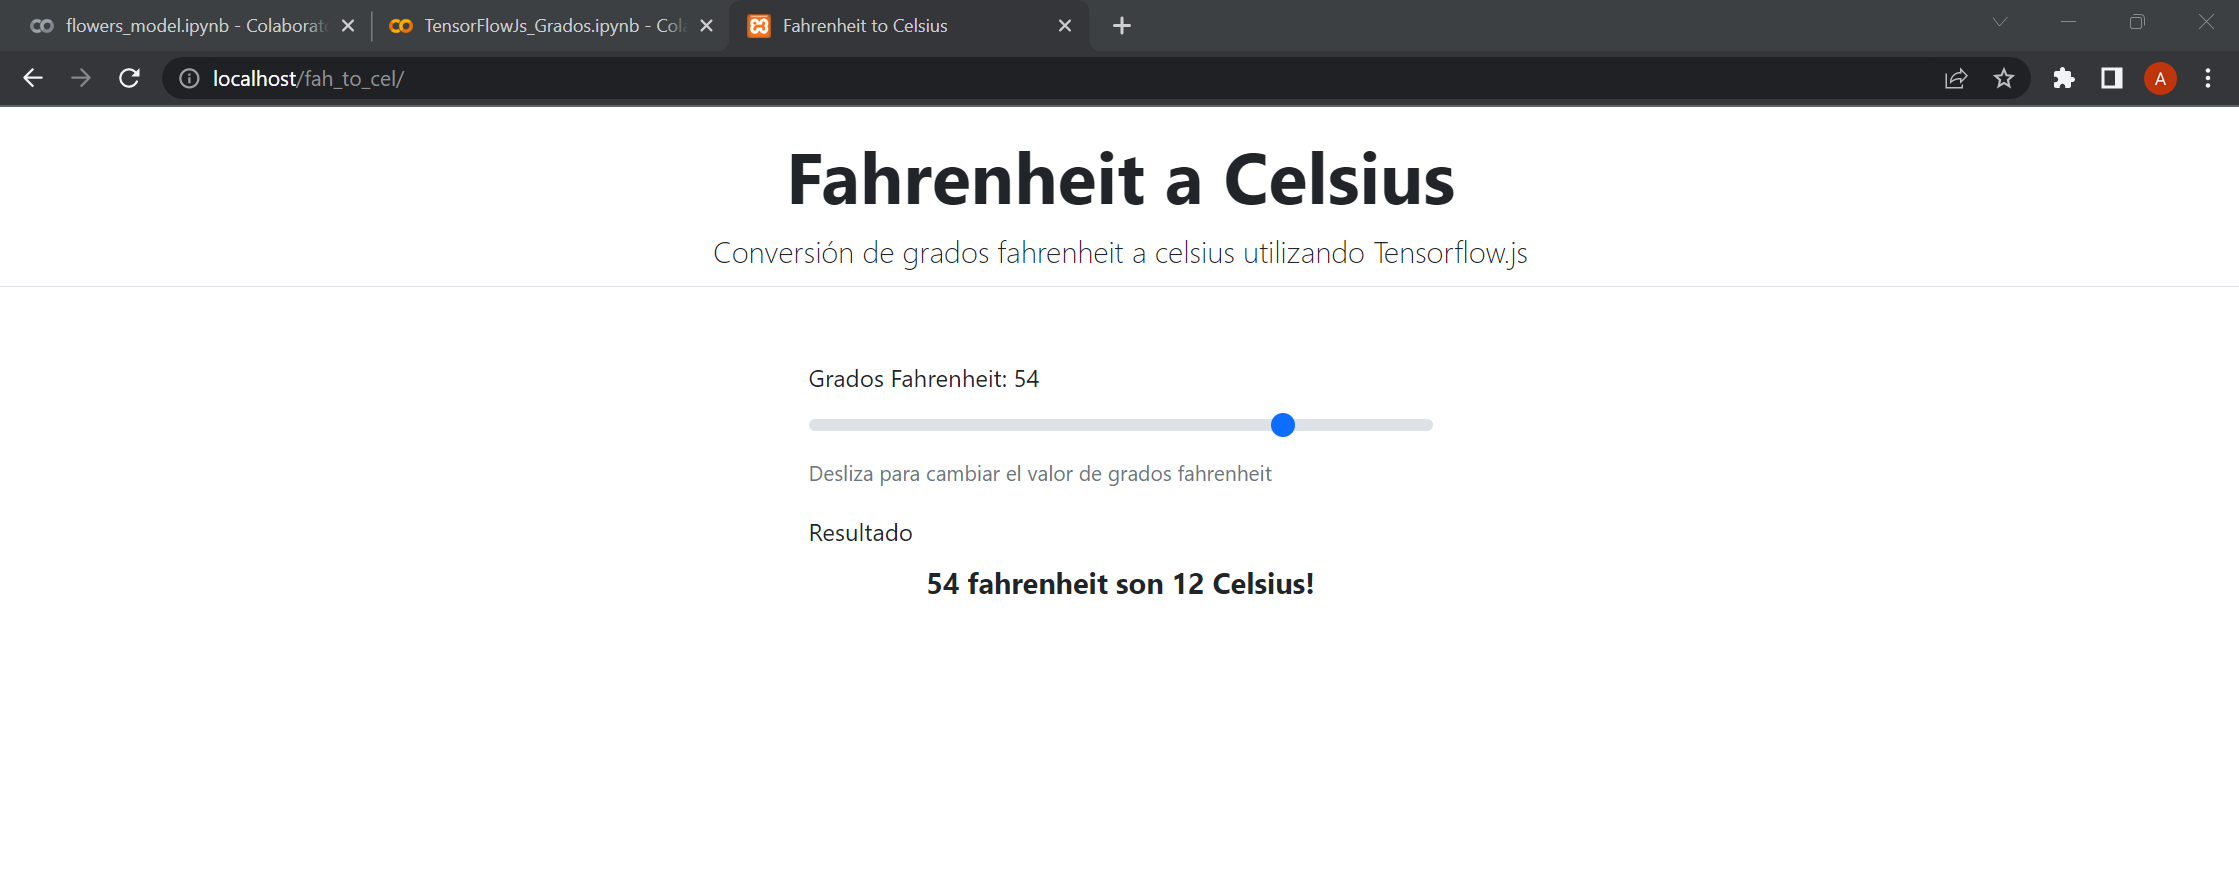